In [1]:
import jupyter_manim

In [2]:
from manim import *
import numpy as np

Manim Community v0.18.1

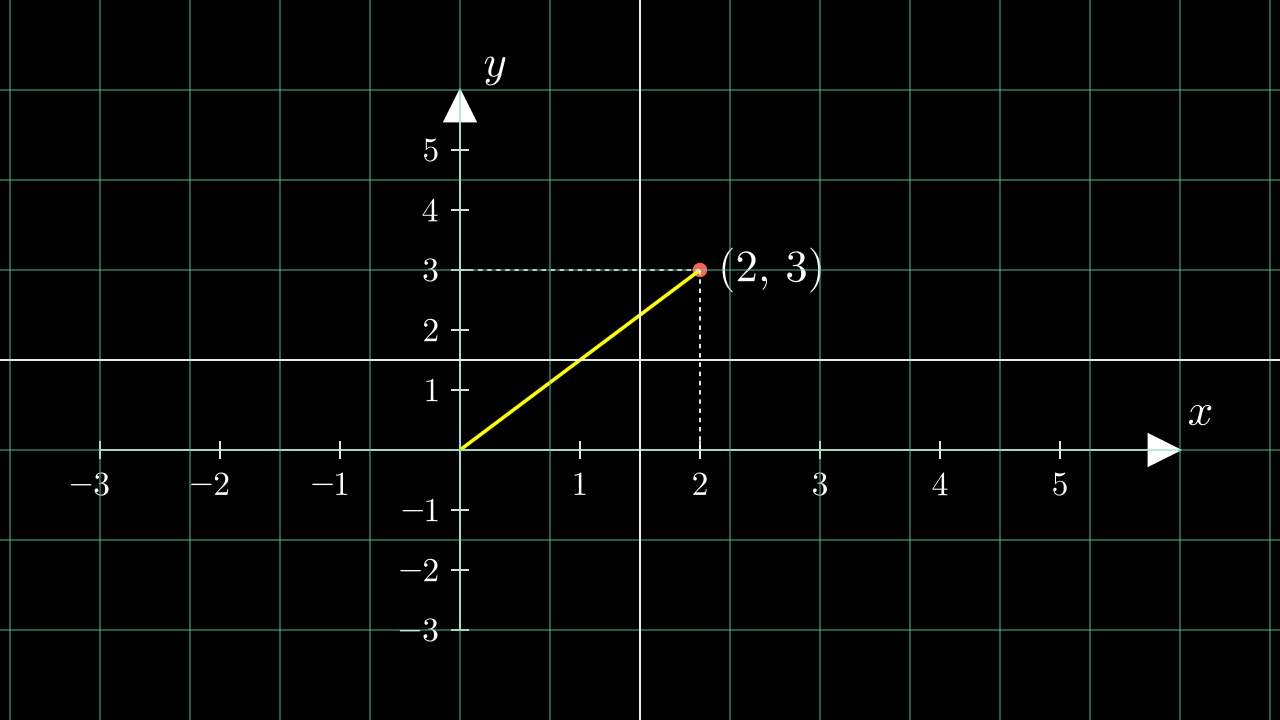

In [24]:
class ComplexNumbers(Scene):
    def construct(self):
        
        ax = Axes(x_range=(-3, 6, 1), y_range=(-3, 6, 1)).add_coordinates()
        labels = ax.get_axis_labels(
            Tex(r"$x$"), Tex(r"$y$")
        )
        
        target_point=ax.c2p(2, 3)
        #adding point
        dot_axes=Dot(target_point, color=RED)
        lines=ax.get_lines_to_point(target_point)

        line=Line(start=ax.c2p(0, 0), 
                    end=target_point,
                   buff=0, 
                   color=YELLOW)
        
        text_point=Tex('(2, 3)').next_to(line.get_end(), RIGHT)
            
        self.add(ax, dot_axes, line, text_point,  lines, labels)
        
#         add grid or remove grid:

        grid = NumberPlane(
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 2,
                "stroke_opacity": 0.5
            }
        )
        self.add(grid)

%manim -qm -v WARNING ComplexNumbers

## Moving the graph & Grouping

In [44]:
class GraphingMovement(Scene):
    def construct(self):
#       optional
        grid = NumberPlane(
            background_line_style={
                "stroke_color": TEAL,
                "stroke_width": 2,
                "stroke_opacity": 0.5
            }
        )
        self.add(grid)
#         
        
        axes=Axes(x_range=(0, 5, 1), 
                  y_range=(0, 3, 1), 
                  x_length=5, 
                  y_length=3, 
                  axis_config={"include_tip": True, 
                               "numbers_to_exclude": [0]}).add_coordinates()
        axes.to_edge(UR)
        axis_labels=axes.get_axis_labels(x_label="x", 
                                         y_label="f(x)")
        
        graph=axes.plot(lambda x: x**0.5, x_range = (0, 4), color = YELLOW)
        
#       Grouping the graphs:
        graphing_stuff=VGroup(axes, graph, axis_labels)
        
        self.play(DrawBorderThenFill(axes), Write(axis_labels))
        self.play(Create(graph))
        self.play(graphing_stuff.animate.shift(DOWN*4))
        self.play(axes.animate.shift(LEFT*3), run_time=3)
        
        
        
%manim -qm -v WARNING GraphingMovement

Manim Community v0.18.1

## Two graph simultaneus change using ValueTracker

In [52]:
class SimultaneousGraphs(Scene):
    def construct(self):
#         Tracks the end value of both functions:
        e=ValueTracker(0.01)
        
        plane=PolarPlane(radius_max=3).add_coordinates()     # creating polar plane
        plane.shift(LEFT*2)                                  # and shifting it to the left 
        
        graph1=always_redraw(lambda: ParametricFunction(lambda t: plane.polar_to_point(2*np.sin(3*t), t), 
                                                        t_range=[0, e.get_value()], 
                                                        color=GREEN))
        
        dot1=always_redraw(lambda: Dot(fill_color=GREEN, 
                                        fill_opacity=0.8)
                                        .scale(0.5)
                                        .move_to(graph1.get_end()))
        
        axes=Axes(x_range=(0, 4, 1),
                  x_length=3, 
                  y_range=(-3, 3, 1), 
                  y_length=3).shift(RIGHT*4)
        axes.add_coordinates()
        
        graph2=always_redraw(lambda: axes.plot(lambda x: 2*np.sin(3*x), 
                                              x_range=(0, e.get_value()), 
                                              color=GREEN))
        dot2=always_redraw(lambda: Dot(fill_color=GREEN, fill_opacity=0.8).scale(0.5).move_to(graph2.get_end()))
        
        self.play(LaggedStart(
            Write(plane), Create(axes), 
            run_time=3, log_ratio=0.5        
        ))
        
        self.add(graph1, graph2, dot1, dot2)
        
        self.play(e.animate.set_value(PI), run_time=10, rate_func=linear)
        self.wait()
                   
%manim -qm -v WARNING SimultaneousGraphs

Manim Community v0.18.1

## Adding two vectors and scaling the scene

In [16]:
class AddingVectors(Scene):
    def construct(self):
        plane=NumberPlane(x_range=(-5, 5, 1), y_range=(-4, 4, 1), x_length=10, y_length=7)
        plane.add_coordinates()
        plane.shift(RIGHT*2)
        
        
        vect1=Line(start=plane.c2p(0, 0), end=plane.c2p(3, 2), stroke_color=YELLOW).add_tip()
        vect1_name=MathTex("\\vec{v}").next_to(vect1, RIGHT, buff=0.1).set_color(YELLOW)
        
        vect2=Line(start=plane.c2p(0, 0), end=plane.c2p(-2, 1), stroke_color=GREEN).add_tip()
        vect2_name=MathTex("\\vec{w}").next_to(vect2, LEFT, buff=0.1).set_color(GREEN)
        
        
        vect4=Line(start=plane.c2p(0, 0), end=plane.c2p(1,3), stroke_color=RED).add_tip()  # sum vector
        vect4_name=MathTex("\\vec{v}+\\vec{w}").next_to(vect4, UP, buff=0.1).set_color(RED)
        
        vect3=Line(start=vect1.get_end(), end=vect4.get_end(), stroke_color=GREEN).add_tip()
        vect3_name=MathTex("\\vec{w}").next_to(vect3, RIGHT, buff=0.1).set_color(GREEN)
        
        stuff=VGroup(plane, vect1, vect1_name, vect2, vect2_name, vect3, vect4, vect4_name)

        rectangle = RoundedRectangle(corner_radius=0.2, height=2.5, width=2.5, stroke_color=PINK).to_edge(DL)
        
       
        
        self.play(DrawBorderThenFill(plane), run_time=2)
        self.wait()
        self.play(GrowFromPoint(vect1, point=vect1.get_start()), Write(vect1_name), run_time=2)
        self.wait()
        self.play(GrowFromPoint(vect2, point=vect2.get_start()), Write(vect2_name), run_time=2)
        self.wait()
        self.play(Transform(vect2, vect3), Transform(vect2_name, vect3_name), run_time=2)
        self.wait()
        self.play(GrowFromPoint(vect4, point=vect4.get_start()), Write(vect4_name), run_time=2)
        self.wait()
        self.add(rectangle)  # Add rectangle before animations
        self.wait()
        self.play(stuff.animate.move_to(rectangle.get_center()).set(width=2.5), run_time=3)
        
             
%manim -qm -v WARNING AddingVectors

Manim Community v0.18.1

## Graphing updaters using always_redraw 

In [ ]:
# Helpers for complex scenes
# function that draws horizontal dash line

def get_horizontal_line_to_graph(axes, function, x, width, color):
    result=VGroup()
    line=DashedLine(
        start=axes.c2p(0, function.underlying_function(x)),
        end=axes.c2p(x, function.underlying_function(x)),
        stroke_width=width, 
        stroke_color=color
    )
    dot=Dot().set_color(color).move_to(axes.c2p(x, function.underlying_function(x)))
    result.add(line, dot)
    return result

